<a href="https://colab.research.google.com/github/aidpod/ml_regression/blob/main/LogisticRegression_excercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression for Classification Task

Predicting whether or not a user will click on an ad based on the information we have on that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes

* 'Age': cutomer age in years

* 'Area Income': Avg. Income of geographical area of consumer

* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet

* 'Ad Topic Line': Headline of the advertisement

* 'City': City of consumer

* 'Male': Whether or not consumer was male

* 'Country': Country of consumer

* 'Timestamp': Time at which consumer clicked on Ad or closed window

* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

# Loading Packages & Data

In [ ]:
# Load all the libraries needed for the lab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn import  preprocessing, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
%matplotlib inline


In [ ]:
# Import the data from GitHub repository
url = "https://raw.githubusercontent.com/aidpod/ml_regression/main/advertising.csv"
data = pd.read_csv(url, sep = ",")

# Exploratory Data Analysis

In [ ]:
# Print/Output the first 5 lines of the dataset
data.xxxxxx()

In [ ]:
# Checking for Null Values
data.info()

In [ ]:
# Getting the summary info about the columns in the dataset
data.describe()

In [ ]:
# Plotting the histograms 
fig, axs = plt.subplots(2, 2, figsize=(7, 7))
sns.histplot(data=data, x = "Daily Time Spent on Site", kde=True,ax=axs[0, 0])
sns.histplot(data=data, x="Age", kde=True, ax=axs[0, 1])
sns.histplot(data=data, x="Area Income", kde=True, ax=axs[1, 0])
sns.histplot(data=data, x="Daily Internet Usage", kde=True, ax=axs[1, 1])
plt.show()

In [ ]:
# Plot the pairs plot of all variables in our dataframe, separating class belonging by color
sns.xxxxxxx(data, hue='Clicked on Ad')

In [ ]:
#Output class count
data['Clicked on Ad'].value_counts()

In [ ]:
#Plot class count
sns.countplot(x='Clicked on Ad', data=data)
plt.show()

In [ ]:
# Output a heatmap of the correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True)

In [ ]:
#Output a list of 'Price' corrolation values sorted from highest to lowest
data.corr()['Clicked on Ad'].sort_values(ascending=False)

In [ ]:
# Check for Outliers:
# Output a series of boxplots, visualising values for each column in the dataset
fig, ax =plt.xxxxxxx(nrows=4,ncols=1,figsize=(20,25))
count = 0
for i in range(4):
    sns.boxplot(x = data[data.columns[i]],ax=ax[i])
    count = count+1

#Data Preparation

In [ ]:
# Remove outliers
# Remove the points outside the interquartile range
for col in ['Area Income']:
  for x in [col]:
      q75,q25 = np.XXXXXXXXXX(data.loc[:,x],[75,25])
      intr_qr = q75-q25
  
      max = q75+(1.5*intr_qr)
      min = q25-(1.5*intr_qr)

      data = data[data[x] > min]
      data = data[data[x] < max]

## Reset index
data = data.reset_index(drop=True)   

In [ ]:
#Remove redundant columns
X = data.drop(['Timestamp', 'Clicked on Ad', 'Ad Topic Line', 'Country', 'City'], axis=1)
y = data['XXXXXXXX']


In [ ]:
#Print the first few rows of the X dataset 
X.head()

In [ ]:
#Standardization using MinMax Scaler
trans = preprocessing.MinMaxScaler()
X = pd.DataFrame(trans.fit_transform(X))
X = X.rename(columns={0: "Daily Time Spent on Site", 1: "Age",2: "Area Income",3: "Daily Internet Usage", 4: "Male"})

In [ ]:
#Print the first few rows of the X dataset
X.head()

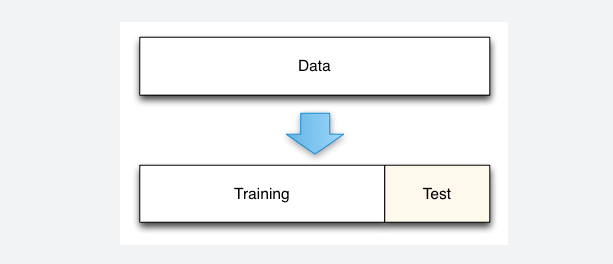

In [ ]:
# Split the X & y data subsets into X_train, X_test, y_train, y_test, where training set makes 70% of data and test set 30 % of data; random state = 42 for repeatablitity
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Print out the sizes of each of X_train, X_test, y_train, y_test
print('X_train size:', X_train.shape)
print('X_test size:', X_test.shape)
print('y_train size:', y_train.shape)
print('y_test size:', y_test.shape)

In [ ]:
#OneHot Encode the gender : no need since the default is Male (0/1 default encoding)

# Fitting Logistic Regression

In [ ]:
# Fit the model to the training data
lr_clf = XXXXXXXXXXX(solver='liblinear')
lr_clf.fit(X_train, y_train)

# Performence Metrics

In [ ]:
# Output performence results for testing  data
pred_test = lr_clf.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, pred_test, output_dict=True))
print("Test Result:\n================================================")        
print(f"Accuracy Score: {accuracy_score(y_test, pred_test) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred_test)}\n")

In [ ]:
# Calculate the confusion matrix
cnf_matrix = metrics.XXXXXXXXXXXXXXX(y_test, pred_test)
fig, ax = plt.subplots()
# Create confusion matrix heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_ticklabels(['Non-clicked Ads', 'Clicked Ads']); ax.yaxis.set_ticklabels(['Non-clicked Ads', 'Clicked Ads']);

##1. Confusion Matrix

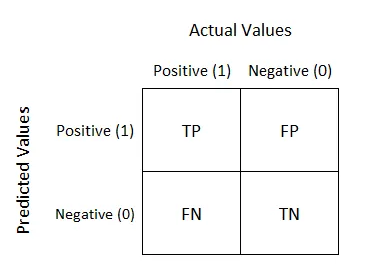

True Positive:

Interpretation: You predicted positive and it’s true.

True Negative:

Interpretation: You predicted negative and it’s true.

False Positive: (Type 1 Error)

Interpretation: You predicted positive and it’s false.

False Negative: (Type 2 Error)

Interpretation: You predicted negative and it’s false.

##2. Precision

Precision measures the accuracy of positive predictions.

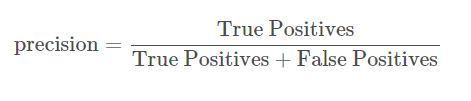

##3. Recall

Precision is typically used with recall (Sensitivity or True Positive Rate). The ratio of positive instances that are correctly detected by the classifier.

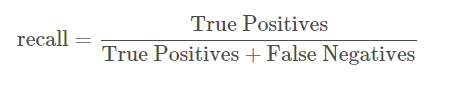

##4. Receiver Operating Characteristics (ROC) Curve

* The ROC curve plots the true positive rate (another name for recall) against 
the false positive rate. The false positive rate (FPR) is the ratio of negative instances that are incorrectly classified as positive. 

* It is equal to one minus the true negative rate, which is the ratio of negative instances that are correctly classified as negative.

* The TNR is also called specificity. Hence the ROC curve plots sensitivity (recall) versus 1 - specificity.

In [ ]:
# Plot the ROC Curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test))
plt.figure(figsize=(9,6)); 
plot_roc_curve(fpr, tpr)
plt.show();

In [ ]:
# Calculate the ROC auc score
#The ROC AUC score tells us how efficient the model is. The higher the AUC, the better the model's performance at distinguishing between the positive and negative classes
roc_auc_score(y_test, lr_clf.predict(X_test))

# Using the model

In [ ]:
daily_time_spent_on_site = int(input("Please enter Daily Time Spent on Site in minutes (e.g. 65) : "))
age = int(input("Please enter Age (e.g. 36) : "))
area_income = int(input("Please enter Area Income (e.g. 60000) : "))
daily_internet_usage = int(input("Please enter Daily Internet Usage in minutes (e.g. 180) : "))
male = int(input("Please enter is the person is Male (1-if yes, 0-if no : "))

In [ ]:
# Predict the output using user input from above:
user_input = [[daily_time_spent_on_site, age, area_income, daily_internet_usage, male]]
user_input_std = pd.DataFrame(trans.fit_transform(user_input))
user_input_std = user_input_std.rename(columns={0: "Daily Time Spent on Site", 1: "Age",2: "Area Income",3: "Daily Internet Usage", 4: "Male"})
prediction = lr_clf.predict(user_input_std)
print("%.2f" % float(prediction))

#Other models

In [ ]:
# SVC: Support Vector Classifier
#Import svm model
from sklearn import svm

# Create a svm Classifier
clf_svc = svm.SVC(kernel='linear') # linear Kernel

#Train the model using the training sets
clf_svc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svc = clf_svc.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svc))
print("Precision:",metrics.precision_score(y_test, y_pred_svc))
print("Recall:",metrics.recall_score(y_test, y_pred_svc))

In [ ]:
# LightGBM is a gradient boosting ensemble method
#Import lightgbm model
import lightgbm as lgb

# Define parameters 
params = {
    'task': 'train', 
    'boosting': 'gbdt',#GradientBoostingDecisionTree
    'objective': 'binary', #Binary target feature
    'max_depth':10,
    'learnnig_rate': 0.05,
    'metric': 'binary_logloss' #metric for binary classification
}

# Converting the dataset into proper LGB format 
d_train=lgb.Dataset(X_train, label=y_train)

# Train the model 
clf_lgb=lgb.train(params,d_train,100) #train the model on 100 epocs
#prediction on the test set
y_pred_lgb=clf_lgb.predict(X_test)

# Convert to 0/1 : if>=0.5 ---> 1, else ---->0
# Rounding the values
y_pred_lgb=y_pred_lgb.round(0)
# Converting from float to integer
y_pred_lgb=y_pred_lgb.astype(int)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lgb))
print("Precision:",metrics.precision_score(y_test, y_pred_lgb))
print("Recall:",metrics.recall_score(y_test, y_pred_lgb))

<h1> Model Comparison:</h1>
<br></br>
<table>
  <thead>
    <tr>
      <th>Model</th>
      <th>Accuracy</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Logistic Regression</td>
      <td>XXXX</td>
    </tr>
    <tr>
      <td>SVC</td>
      <td>XXXX</td>
    </tr>
    <tr>
      <td>Lightgbm</td>
      <td>XXXX</td>
    </tr>
  </tbody>
</table>

#Multiclass Classification

In [ ]:
# Loading the dataset
from sklearn.datasets import load_wine

data=load_wine()
print(list(data.target_names))
df_1=pd.DataFrame(data.data,columns=data.feature_names)
Y_1=data.target
print(np.unique(Y_1))

#Scaling using the Standard Scaler
sc_1=StandardScaler()
sc_1.fit(df_1)
X_1=pd.DataFrame(sc_1.fit_transform(df_1))

# Train-test-split
X_train,X_test,y_train,y_test=train_test_split(X_1,Y_1,test_size=0.3,random_state=0)

# Converting the dataset in proper LGB format
d_train=lgb.Dataset(X_train, label=y_train)

# setting up the parameters
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='multiclass' #Multi-class target feature
params['metric']='multi_logloss' #metric for multi-class
params['max_depth']=10
params['num_class']=3 #no.of unique values in the target class 

# Training the model
clf=lgb.train(params,d_train,100)  #training the model on 100 epocs

# Prediction on the test dataset
y_pred_multi=clf.predict(X_test)

# argmax() method for converting to class values
y_pred_multi = [np.argmax(line) for line in y_pred_multi]

# Evaluation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_multi))
print("Precision:",metrics.precision_score(y_test, y_pred_multi, average='micro'))
print("Recall:",metrics.recall_score(y_test, y_pred_multi, average='micro'))

In [ ]:
# Confusion matrix for multiclass clasification

# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred_multi)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['class_0', 'class_1', 'class_2'], 
                     columns = ['class_0', 'class_1', 'class_2'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()